In [2]:
import pandas as pd
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
p = pd.read_csv('phishing_dataset_full.csv')

In [6]:
p2 = pd.read_csv('phishing_dataset.csv')

In [15]:
p2.phishing.value_counts()[1] / p2.shape[0] * 0.95

0.32843356233149457

In [115]:
shuffled = p2.sample(frac = 1, random_state = 42)

In [111]:
train, validate, test = np.split(shuffled, [int(0.70*len(shuffled)), int(0.85*len(shuffled))])

In [117]:
train.columns

Index(['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url',
       'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url',
       'qty_exclamation_url', 'qty_space_url',
       ...
       'qty_ip_resolved', 'qty_nameservers', 'qty_mx_servers', 'ttl_hostname',
       'tls_ssl_certificate', 'qty_redirects', 'url_google_index',
       'domain_google_index', 'url_shortened', 'phishing'],
      dtype='object', length=112)

In [121]:
simple = sm.ols('phishing~length_url+qty_at_url+qty_slash_url+qty_slash_domain+domain_in_ip+qty_hyphen_domain+url_shortened+qty_redirects+qty_ip_resolved+asn_ip', data = train).fit()
simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               phishing   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     7160.
Date:                Sun, 05 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:26:01   Log-Likelihood:                -19860.
No. Observations:               62052   AIC:                         3.974e+04
Df Residuals:                   62042   BIC:                         3.983e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0847      0.003     32.204      0.000       0.080       0.090
length_url            0.0008   3.77e-05     20.101      0.000       0.001       0.001
qty_at_url            0.0587      0.005     11.262      0.000       0.049       0.069
qty_slash_url         0.1604      0.001    182.687      0.000       0.159       0.162
qty_slash_domain   1.802e-16   8.59e-18     20.976      0.000    1.63e-16    1.97e-16
domain_in_ip          0.2907      0.029     10.075      0.000       0.234       0.347
qty_hyphen_domain     0.0931      0.003     29.373      0.000       0.087       0.099
url_shortened         0.6612      0.018     36.663      0.000       0.626       0.697
qty_redirects        -0.0198      0.002    -11.157      0.000      -0.023      -0.016
qty_ip_resolved       0.0022      0.002      1.408      0.159      -0.001       0.005
asn_ip              5.12e-07   2.96e-08     17.308      0.000    4.54e-07     5.7e-07
==============================================================================
Omnibus:                     8270.661   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            88354.020
Skew:                           0.255   Prob(JB):                         0.00
Kurtosis:                       8.823   Cond. No.                     2.08e+22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.35e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [122]:
interact = sm.ols('phishing~length_url*qty_at_url+length_url*qty_slash_url+qty_slash_domain+domain_in_ip*qty_ip_resolved*asn_ip+qty_hyphen_domain+url_shortened+qty_redirects', data = train).fit()
interact.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               phishing   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     5499.
Date:                Sun, 05 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:31:52   Log-Likelihood:                -18177.
No. Observations:               62052   AIC:                         3.638e+04
Df Residuals:                   62038   BIC:                         3.651e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               0.0430      0.003     15.516      0.000       0.038       0.048
length_url                              0.0019   4.16e-05     44.651      0.000       0.002       0.002
qty_at_url                              0.1639      0.010     16.179      0.000       0.144       0.184
length_url:qty_at_url                  -0.0005    3.5e-05    -13.460      0.000      -0.001      -0.000
qty_slash_url                           0.1704      0.001    193.126      0.000       0.169       0.172
length_url:qty_slash_url               -0.0002   3.97e-06    -55.552      0.000      -0.000      -0.000
qty_slash_domain                    -3.155e-15   8.22e-16     -3.840      0.000   -4.77e-15   -1.54e-15
domain_in_ip                            0.1465      0.017      8.701      0.000       0.113       0.179
qty_ip_resolved                         0.0133      0.002      7.294      0.000       0.010       0.017
domain_in_ip:qty_ip_resolved            0.1465      0.017      8.701      0.000       0.113       0.179
asn_ip                               1.106e-06   6.08e-08     18.189      0.000    9.87e-07    1.23e-06
domain_in_ip:asn_ip                 -2.993e-07   3.48e-07     -0.860      0.390   -9.82e-07    3.83e-07
qty_ip_resolved:asn_ip              -5.796e-07   4.99e-08    -11.616      0.000   -6.77e-07   -4.82e-07
domain_in_ip:qty_ip_resolved:asn_ip -2.993e-07   3.48e-07     -0.860      0.390   -9.82e-07    3.83e-07
qty_hyphen_domain                       0.0892      0.003     28.890      0.000       0.083       0.095
url_shortened                           0.6855      0.018     38.900      0.000       0.651       0.720
qty_redirects                          -0.0201      0.002    -11.575      0.000      -0.024      -0.017
==============================================================================
Omnibus:                    16442.304   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           256672.417
Skew:                           0.857   Prob(JB):                         0.00
Kurtosis:                      12.815   Cond. No.                     3.51e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.71e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [124]:
interact2 = sm.ols('phishing~length_url*qty_at_url+length_url*qty_slash_url+qty_slash_domain+domain_in_ip*qty_ip_resolved+qty_ip_resolved*asn_ip+qty_hyphen_domain+url_shortened+qty_redirects', data = train).fit()
interact2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               phishing   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     5957.
Date:                Sun, 05 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:34:55   Log-Likelihood:                -18177.
No. Observations:               62052   AIC:                         3.638e+04
Df Residuals:                   62039   BIC:                         3.650e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        0.0430      0.003     15.530      0.000       0.038       0.048
length_url                       0.0019   4.16e-05     44.654      0.000       0.002       0.002
qty_at_url                       0.1639      0.010     16.181      0.000       0.144       0.184
length_url:qty_at_url           -0.0005    3.5e-05    -13.461      0.000      -0.001      -0.000
qty_slash_url                    0.1704      0.001    193.125      0.000       0.169       0.172
length_url:qty_slash_url        -0.0002   3.97e-06    -55.553      0.000      -0.000      -0.000
qty_slash_domain              5.152e-17   3.22e-18     15.986      0.000    4.52e-17    5.78e-17
domain_in_ip                     0.1385      0.014      9.862      0.000       0.111       0.166
qty_ip_resolved                  0.0132      0.002      7.292      0.000       0.010       0.017
domain_in_ip:qty_ip_resolved     0.1385      0.014      9.862      0.000       0.111       0.166
asn_ip                        1.105e-06   6.08e-08     18.173      0.000    9.86e-07    1.22e-06
qty_ip_resolved:asn_ip       -5.794e-07   4.99e-08    -11.611      0.000   -6.77e-07   -4.82e-07
qty_hyphen_domain                0.0892      0.003     28.891      0.000       0.083       0.095
url_shortened                    0.6855      0.018     38.901      0.000       0.651       0.720
qty_redirects                   -0.0201      0.002    -11.573      0.000      -0.024      -0.017
==============================================================================
Omnibus:                    16442.882   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           256678.572
Skew:                           0.857   Prob(JB):                         0.00
Kurtosis:                      12.815   Cond. No.                     2.19e+22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.53e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

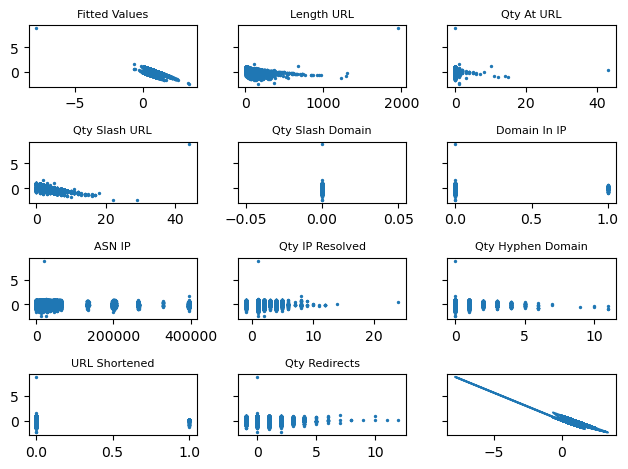

In [131]:
f, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12)) = plt.subplots(4,3, sharey=True)
ax1.scatter(interact2.fittedvalues, interact2.resid, s = 2)
ax2.scatter(train.length_url, interact2.resid, s = 2)
ax3.scatter(train.qty_at_url, interact2.resid, s = 2)
ax4.scatter(train.qty_slash_url, interact2.resid, s = 2)
ax5.scatter(train.qty_slash_domain, interact2.resid, s = 2)
ax6.scatter(train.domain_in_ip, interact2.resid, s = 2)
ax7.scatter(train.asn_ip, interact2.resid, s = 2)
ax8.scatter(train.qty_ip_resolved, interact2.resid, s = 2)
ax9.scatter(train.qty_hyphen_domain, interact2.resid, s = 2)
ax10.scatter(train.url_shortened, interact2.resid, s = 2)
ax11.scatter(train.qty_redirects, interact2.resid, s = 2)
ax12.plot(interact2.fittedvalues, interact2.resid)
ax1.set_title('Fitted Values', fontsize = 8)
ax2.set_title('Length URL', fontsize = 8)
ax3.set_title('Qty At URL', fontsize = 8)
ax4.set_title('Qty Slash URL', fontsize = 8)
ax5.set_title('Qty Slash Domain', fontsize = 8)
ax6.set_title('Domain In IP', fontsize = 8)
ax7.set_title('ASN IP', fontsize = 8)
ax8.set_title('Qty IP Resolved', fontsize = 8)
ax9.set_title('Qty Hyphen Domain', fontsize = 8)
ax10.set_title('URL Shortened', fontsize = 8)
ax11.set_title('Qty Redirects', fontsize = 8)
f.tight_layout()

In [133]:
pred = interact2.predict(test)
np.sqrt(((test.phishing - pred)**2).mean())

0.31644032472232214